In [181]:
import numpy as np
import pandas as pd
import numpy.ma as ma
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [182]:
class Data:
    
    def __init__(self, ruta):
        self.ruta = ruta
        self.upload = self.upload()
    
    def upload(self):
        data = pd.read_csv(self.ruta,delimiter=';',header=None)
        data = data.to_numpy()
        return data
    
    def drop_nan_rows(self):
        data_filt = np.delete(self.upload,(np.where(np.isnan(self.upload))), axis = 0)
        return data_filt
    
    def imp_mean(self):
        data_mean = np.where(np.isnan(self.upload), ma.array(self.upload, mask=np.isnan(self.upload)).mean(axis=0), self.upload)
        return data_mean
 
    def split_dataset(self, data_imput, percentage):
    
        X = data_imput[:,:6]
        y = data_imput[:,6:]
    
        permutation = np.random.permutation(X.shape[0])
        train_idx, test_idx = np.split(permutation, 
                 [int(percentage * len(permutation))])
    
        X_train = X[train_idx]
        X_test = X[test_idx]

        y_train = y[train_idx]
        y_test = y[test_idx]
        
        return X_train, X_test, y_train, y_test
       

## Creación de dos datasets con tratamiento de nans diferentes

In [183]:
data= Data("../data/clase3V2.csv")
df_imput = data.drop_nan_rows()
X_train_drop, X_test_drop, y_train_drop, y_test_drop = data.split_dataset(df_imput, 0.8)
print(X_train_drop.shape)
print(X_test_drop.shape)
print(y_train_drop.shape)
print(y_test_drop.shape)

(60, 6)
(15, 6)
(60, 1)
(15, 1)


In [184]:
df_mean = data.imp_mean()
X_train_mean, X_test_mean, y_train_mean, y_test_mean = data.split_dataset(df_mean, 0.8)
print(X_train_mean.shape)
print(X_test_mean.shape)
print(y_train_mean.shape)
print(y_test_mean.shape)

(80, 6)
(20, 6)
(80, 1)
(20, 1)


## aplicación de pca para ambos datasets

#### PCA drop nans

In [185]:
pca_drop = PCA(n_components=3, random_state=2).fit(X_train_drop)
X_train_pca_drop = pca_drop.transform(X_train_drop)
X_test_pca_drop = pca_drop.transform(X_test_drop)
print(X_train_pca_drop.shape)
print(X_test_pca_drop.shape)

(60, 3)
(15, 3)


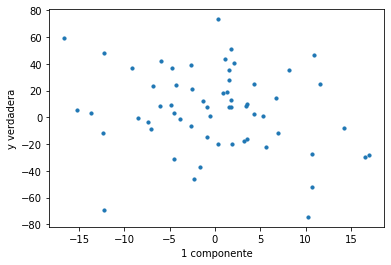

In [186]:
f ,ax = plt.subplots()
ax.scatter(X_train_pca_drop[:,1],y_train_drop, s= 10)
ax.set_xlabel('1 componente')
ax.set_ylabel('y verdadera')
plt.show()

#### PCA imputación por media

In [187]:
pca_mean = PCA(n_components=3, random_state=2).fit(X_train_mean)
X_train_pca_mean = pca_mean.transform(X_train_mean)
X_test_pca_mean = pca_mean.transform(X_test_mean)
print(X_train_pca_mean.shape)
print(X_test_pca_mean.shape)

(80, 3)
(20, 3)


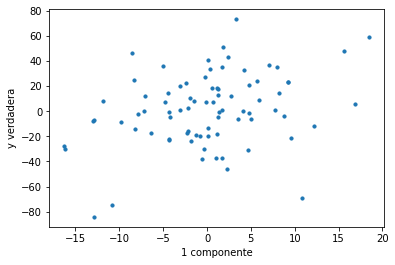

In [188]:
f ,ax = plt.subplots()
ax.scatter(X_train_pca_mean[:,1],y_train_mean, s= 10)
ax.set_xlabel('1 componente')
ax.set_ylabel('y verdadera')
plt.show()

## Regresión lineal

In [195]:
class BaseModel(object):

    def __init__(self):
        self.model = None

    def fit(self, X, Y):
        return NotImplemented

    def predict(self, X):
        return NotImplemented

class LinearRegression(BaseModel):

    def fit(self, x, y):
        if len(x.shape) == 1:
            b = np.dot(np.linalg.inv(np.dot(x.T,x)), np.dot(x.T,y))
        else:
            b = np.dot(np.linalg.pinv(np.dot(x.T,x)), np.dot(x.T,y))
        self.model = b
        

    def predict(self, x):
        return  x.T * self.model

#### Regresión Lineal para drop nans

In [196]:
linear_regression = LinearRegression()
linear_regression.fit(X_train_pca_drop, y_train_drop)
pred_drop = linear_regression.predict(X_test_pca_drop)

#### Regresión Lineal para imputación por media

In [197]:
linear_regression = LinearRegression()
linear_regression.fit(X_train_pca_mean, y_train_mean)
pred_mean = linear_regression.predict(X_test_pca_mean)

## MSE

In [200]:
class Metric(object):
    def __call__(self, truth, pred):
        return NotImplemented

class MSE(Metric):
    def __init__(self):
        Metric.__init__(self)

    def __call__(self, truth, pred):
        n = truth.size
        return np.sum((truth - pred.T) ** 2) / n


In [201]:
mse = MSE()
mse_drop = mse(y_test_drop, pred_drop)
print(mse_drop)

2217.907237099174


In [202]:
mse = MSE()
mse_mean = mse(y_test_mean, pred_mean)
print(mse_mean)

1859.0829027517484
